#Reto

In [3]:
# 1) Entiende mediante una agregacion cual es el coche más caro por año y pinta los máximos en un gráfico
# Consejo = renombra las columnas para que te sea más sencillo operar con ellas

# 2) Recomendación : ¿hay alguna ganga?
# Consejo = investiga si hay un coche relativamente nuevo (con pocos años) , con pocos km y a un precio menor con caracteristicas similares

In [5]:
import pandas as pd
import numpy as np
import io
from google.colab import files
pd.set_option('display.float_format', lambda x: '%.2f' % x) # truco para notación cientifica

In [8]:
uploaded = files.upload()

Saving CAR DETAILS FROM CAR DEKHO.csv to CAR DETAILS FROM CAR DEKHO.csv


In [9]:
df = pd.read_csv(io.StringIO(uploaded['CAR DETAILS FROM CAR DEKHO.csv'].decode('utf-8')))
df.head(2)


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner


In [10]:
df.groupby('name').agg({'selling_price':'max', 'year':'max'}).reset_index().rename(columns = {'selling_price':'precio_venta'}).head(3)


,name,precio_venta,year
0,Ambassador CLASSIC 1500 DSL AC,120000,2005
1,Ambassador Classic 2000 Dsz,50000,2002
2,Ambassador Grand 1800 ISZ MPFI PW CL,430000,2012


In [11]:
df.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0


array([[<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'selling_price'}>],
       [<Axes: title={'center': 'km_driven'}>, <Axes: >]], dtype=object)

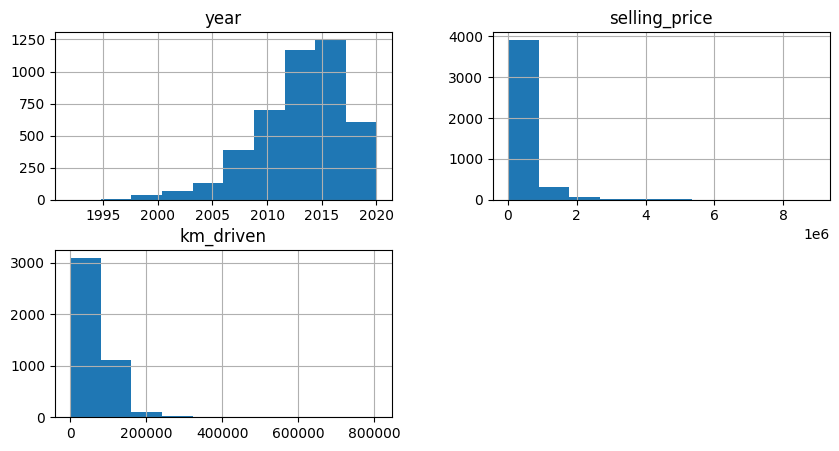

In [12]:
df.hist(figsize = (10,5))

In [13]:
df.groupby(["name","year"]).agg({"selling_price":"max"}).reset_index().sort_values(by = "selling_price", ascending = False).rename(columns = {"selling_price":"precio_venta"}).head(3)

,name,year,precio_venta
33,Audi RS7 2015-2019 Sportback Performance,2016,8900000
1896,Mercedes-Benz S-Class S 350d Connoisseurs Edition,2017,8150000
1889,Mercedes-Benz GLS 2016-2020 350d 4MATIC,2016,5500000


In [14]:
df.groupby(["name", "year"]).agg({"km_driven": "min", "selling_price": "min"}).reset_index().sort_values(by=["km_driven", "selling_price"], ascending=[True, True]).rename(columns={"selling_price": "precio_venta"}).head(3)

,name,year,km_driven,precio_venta
1067,Mahindra Quanto C6,2014,1,250000
366,Ford Figo Titanium,2020,101,635000
371,Ford Freestyle Titanium Diesel,2020,101,784000


In [74]:
df_agg = df.groupby(['year','name']).agg({'selling_price':['mean','max'] , 'km_driven':'mean'}).reset_index().sort_values(by = 'year' , ascending = False).rename(columns = {'selling_price':'average_selling_price'})


In [77]:
[('year', ''),
 ('average_selling_price', 'mean'),
 ('average_selling_price', 'max'),
 ('km_driven', 'mean'),


 ('name','name'),]


[('year', ''),
 ('average_selling_price', 'mean'),
 ('average_selling_price', 'max'),
 ('km_driven', 'mean'),
 ('name', 'name')]

In [84]:
df_agg.head(3)

year                                   name average_selling_price  \
                                                                   mean   
2500  2020  Volkswagen Polo 1.0 TSI Highline Plus             802000.00   
2469  2020                Ford Freestyle Titanium             811999.00   
2477  2020       Hyundai Grand i10 Nios AMT Magna             640000.00   

             km_driven  
         max      mean  
2500  802000   5000.00  
2469  811999   1010.00  
2477  640000   4000.00

<Axes: xlabel='(name, )'>

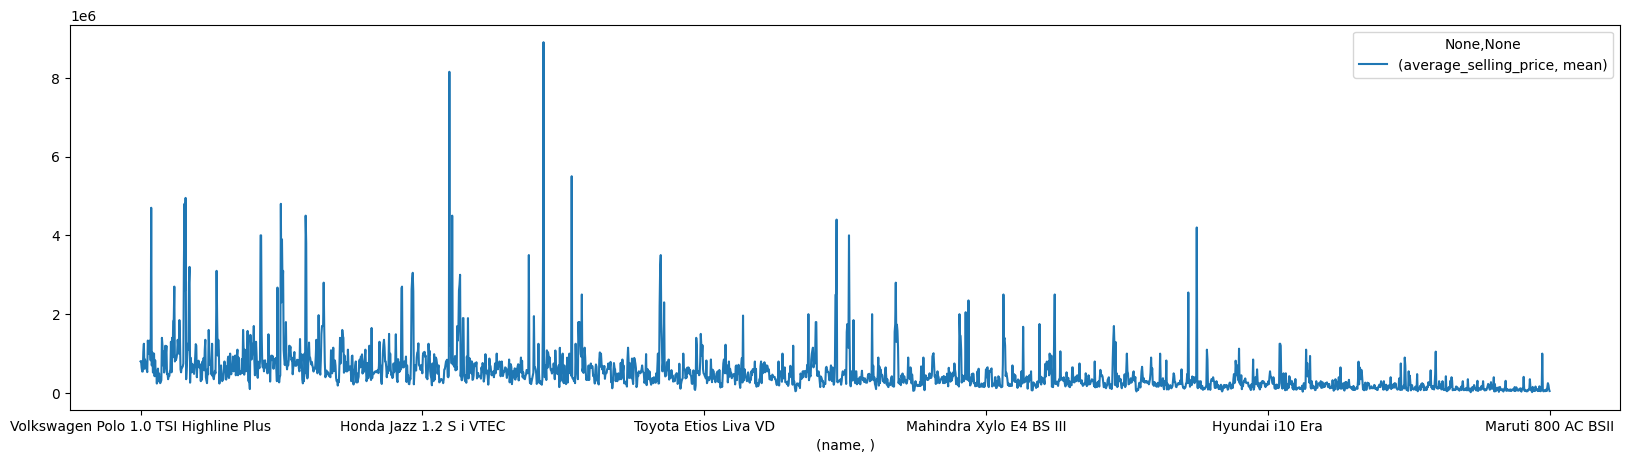

In [99]:
df_agg.plot(x=('name', ''), y=('average_selling_price', 'mean'), kind='line', figsize=(20, 5))
